In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from sklearn import metrics
import pickle

In [2]:
df = pd.read_excel("Copper_Set.xlsx", sheet_name='Result 1')
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
# verify the unique items in every features

for i in list(df.columns):
    print(f"{i} : {df[i].nunique()}")

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [5]:
#convert the data type from object to numeric

df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [6]:
# make additional feature from date's columns 

df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

In [7]:
#verify the data type of each features

df.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [8]:
#checking null values in each features

df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [9]:
# handling some unwanted values start with ('00000') and checking null values

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.isnull().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [10]:
# droping the columns

df.drop(columns=['id','item_date','delivery date','material_ref'], inplace=True)
df

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [97]:
# quantity and selling price values are not below 0. so we convert to null for below 0 value

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df['thickness'] = df['thickness'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.00001,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561441e+01,1.775342e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [98]:
df.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [99]:
# Handling null values using median and mode

df['status'].fillna(df['status'].mode().iloc[0],inplace=True)

df['quantity tons'].fillna(df['quantity tons'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(),inplace=True)
df['country'].fillna(df['country'].median(),inplace=True)
df['application'].fillna(df['application'].median(),inplace=True)
df['thickness'].fillna(df['thickness'].median(),inplace=True)
df['selling_price'].fillna(df['selling_price'].median(),inplace=True)

In [100]:
# verify null values for each features

df.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [101]:
#copy the dataframe to another to check the skewness and outliers

df_1=df.copy()
df_1.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00


In [102]:
#checking the skew for each features

for col in ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width','product_ref', 'selling_price']:
    print(col)
    print(skew(df_1[col]))

quantity tons
424.68730994731504
customer
86.9845901502091
country
0.7538286488466676
application
0.7245583983073829
thickness
303.4450657126513
width
0.37459367901082125
product_ref
1.0152071910463223
selling_price
301.38559971625915


In [103]:
# function for box plot, hist plot, violin plot to understand through visualize

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

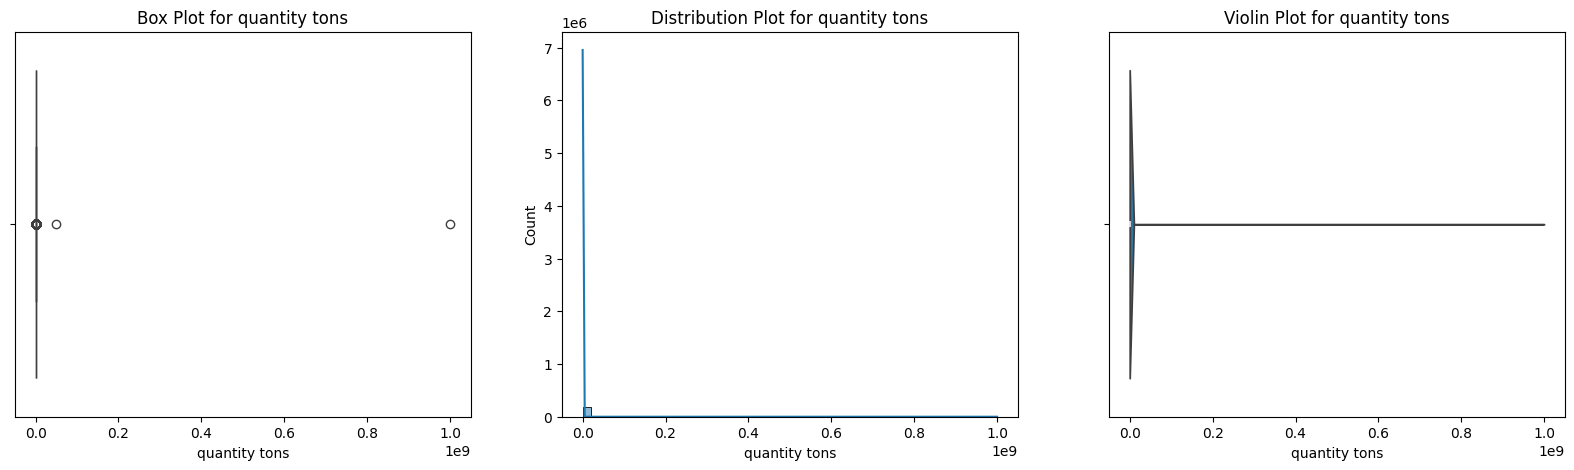

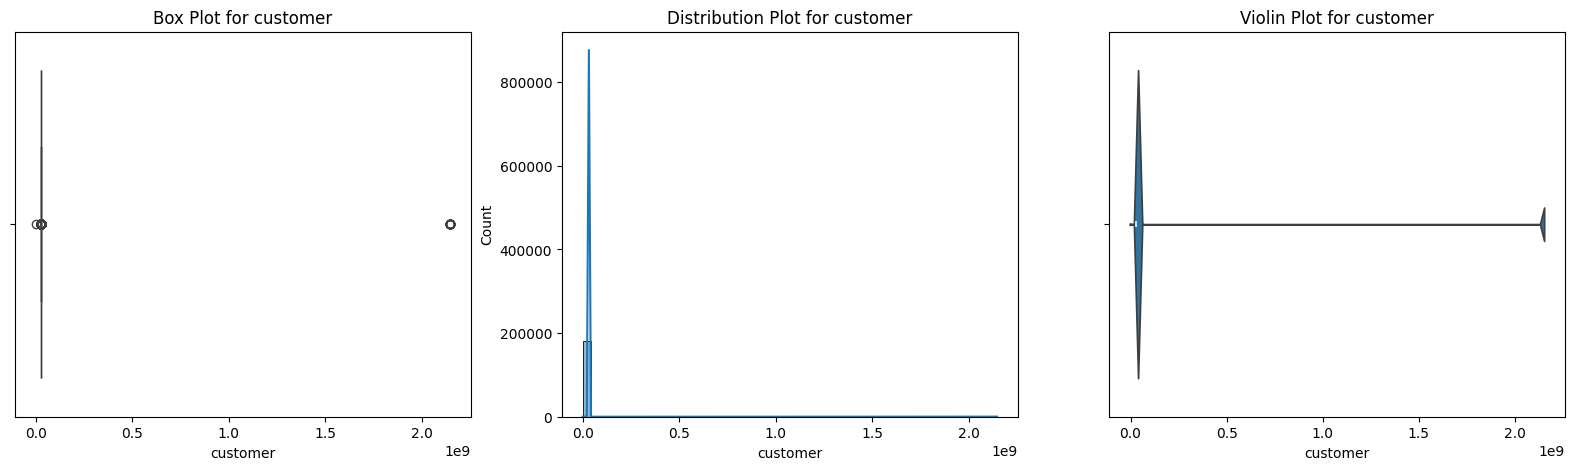

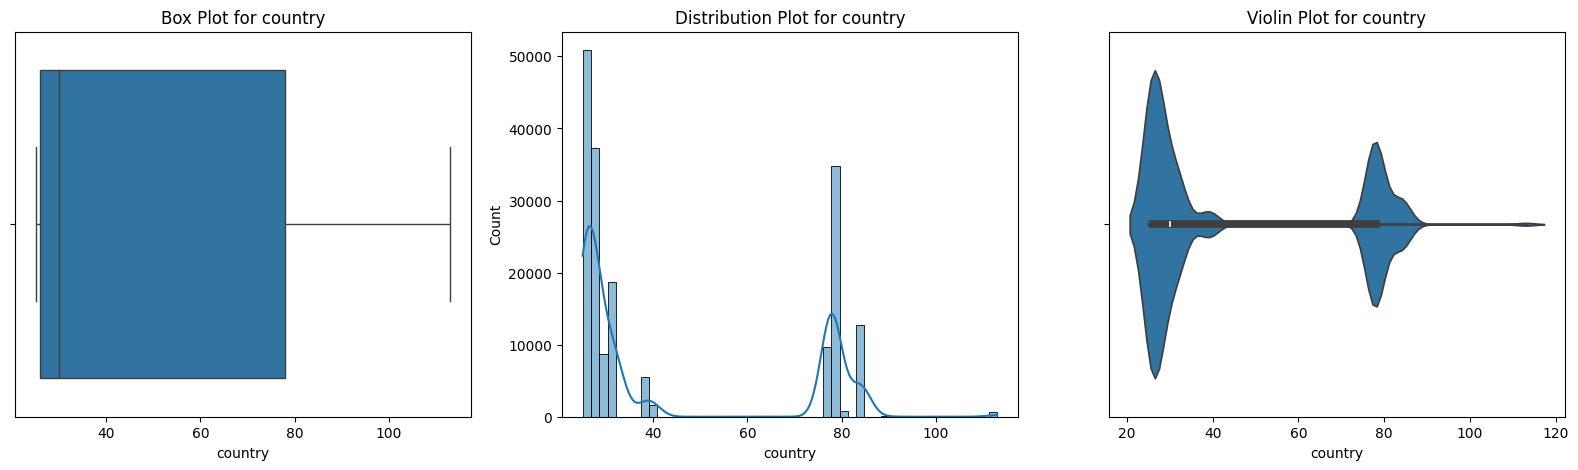

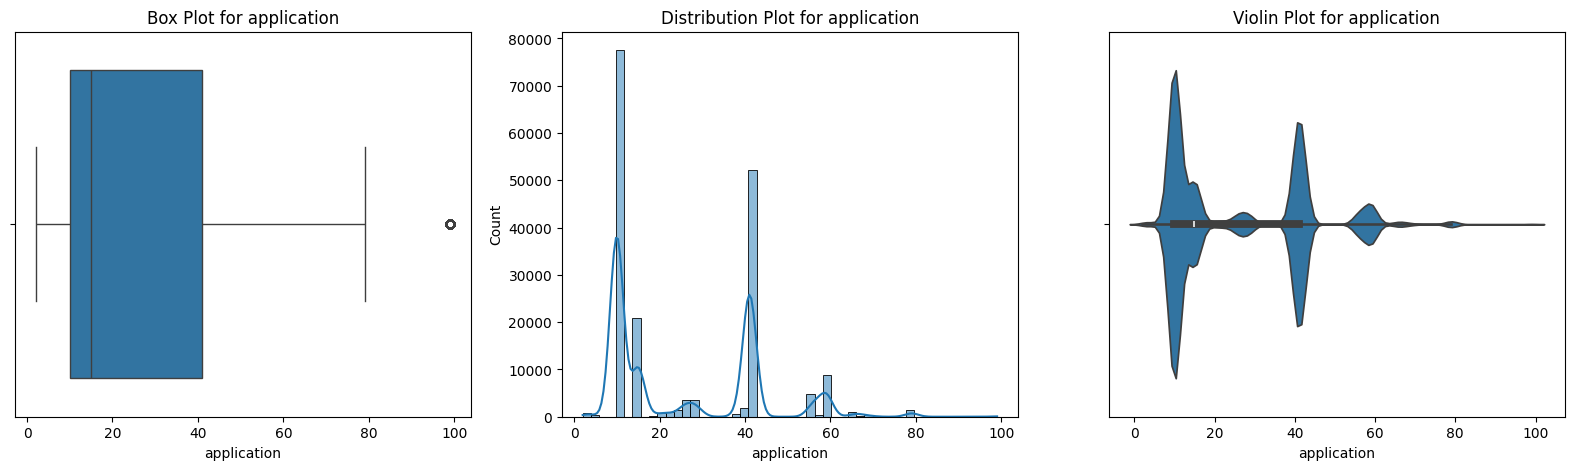

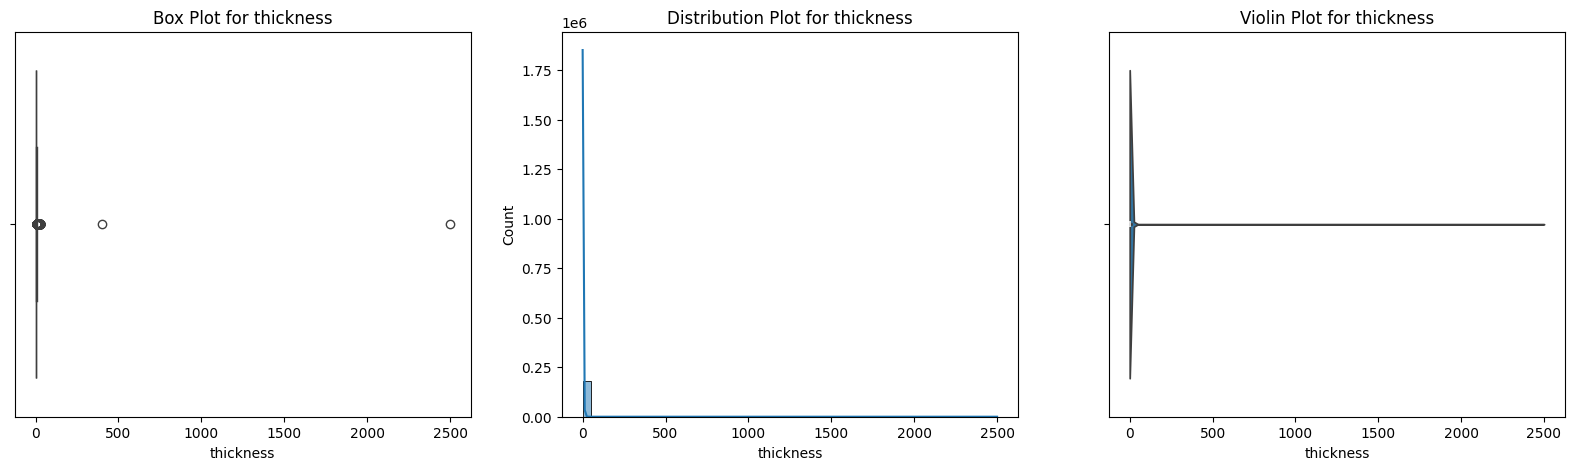

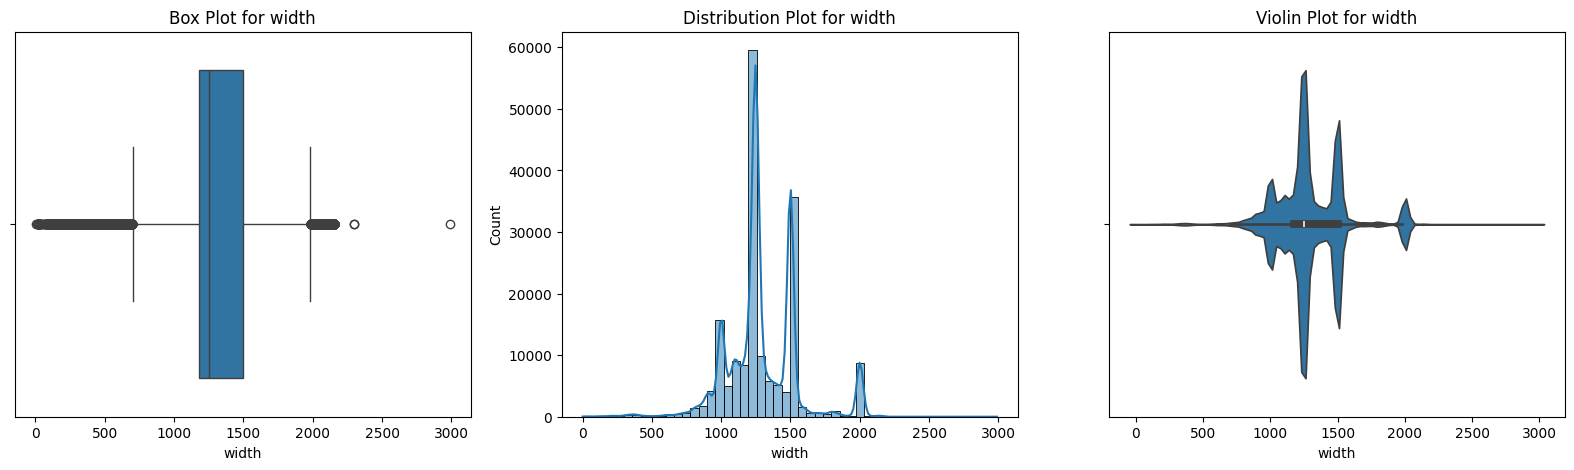

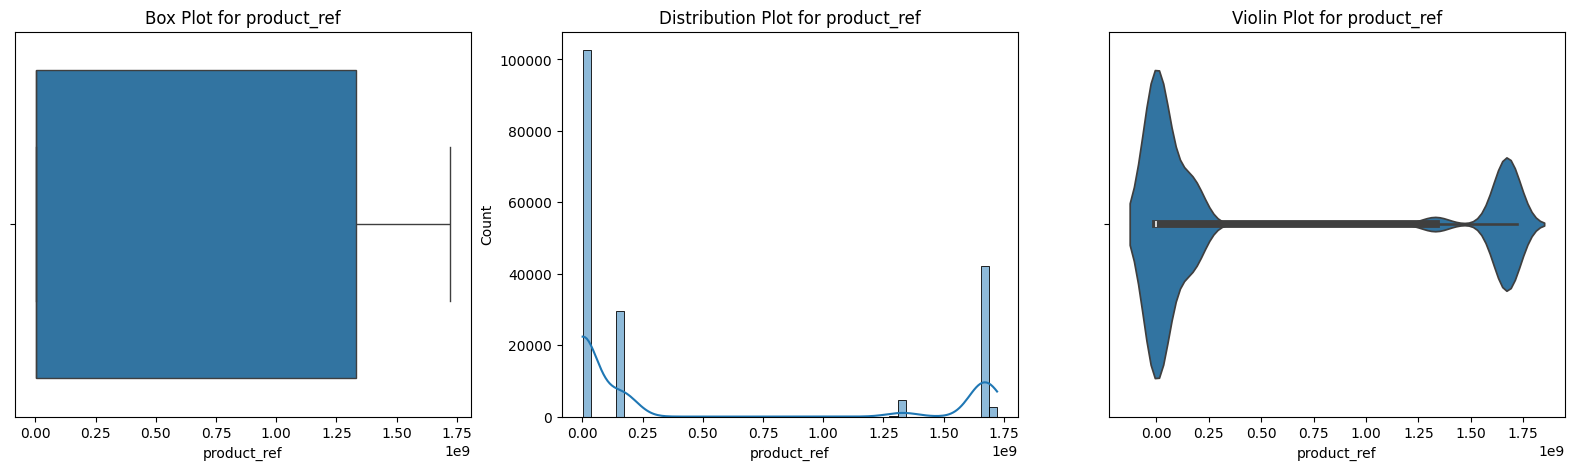

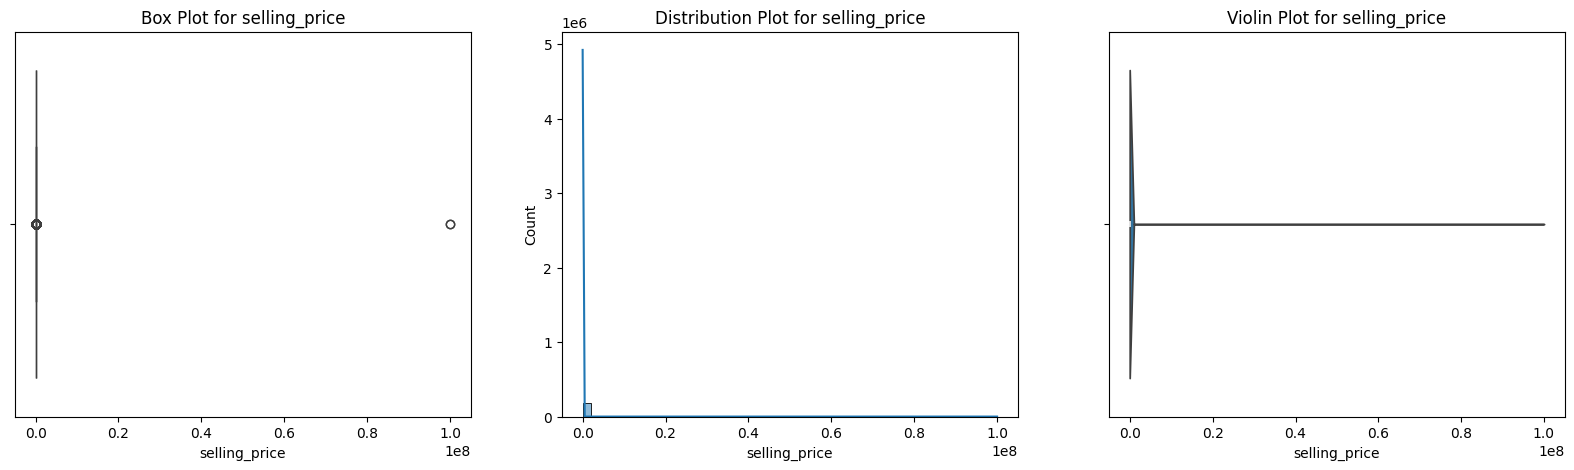

In [104]:
# plotting the features to check skew and outliers

for i in ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width','product_ref', 'selling_price']:
    plot(df_1, i)

In [105]:
# handling skew with log transformation method

df_1['quantity_tons_log']=np.log(df_1['quantity tons'])
df_1['thickness_log']=np.log(df_1['thickness'])
df_1['selling_price_log']=np.log(df_1['selling_price'])
df_1.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,quantity_tons_log,thickness_log,selling_price_log
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,3.991779,0.693147,6.749931
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,6.643822,-0.223144,6.953684
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,5.956169,-0.967584,6.468211
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,5.310301,0.832909,6.643790
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,6.666354,1.386294,6.357842


In [106]:
df_1.drop(columns=['quantity tons','thickness','selling_price'], inplace=True)
df_1.head()

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,2000.0,640665,6.666354,1.386294,6.357842


In [107]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [108]:
# using outlier function handle the outliers for the below features

outlier(df_1,'quantity_tons_log')
outlier(df_1,'thickness_log')
outlier(df_1,'selling_price_log')
outlier(df_1,'width')
df_1

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,Won,W,41.0,1250.0,164141591,3.413291,-0.162519,6.398595


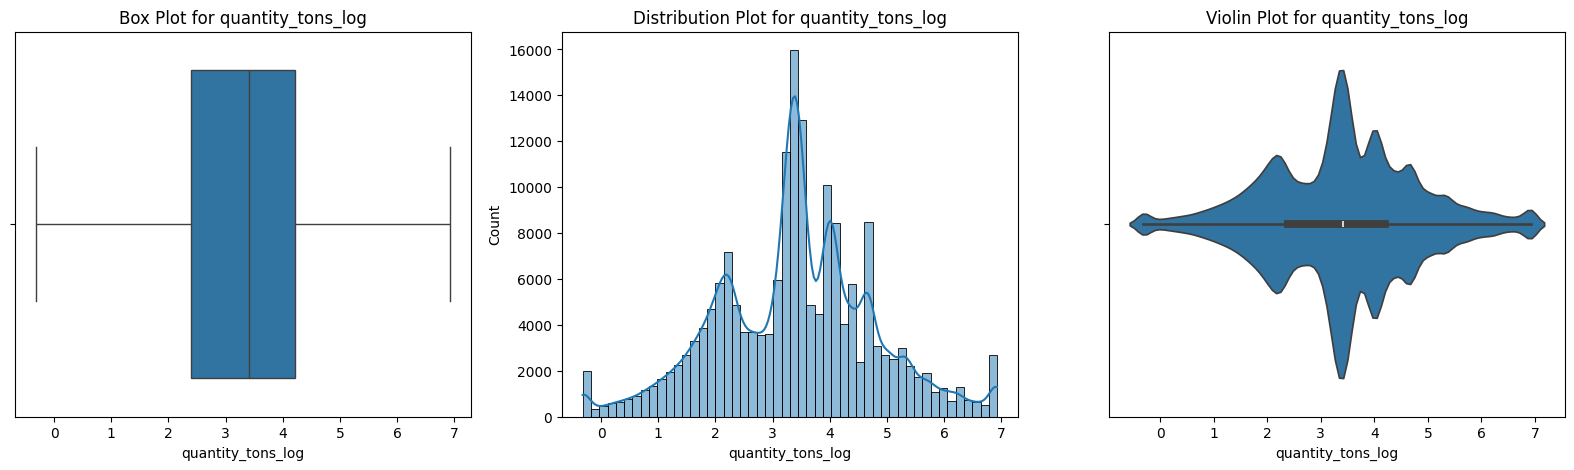

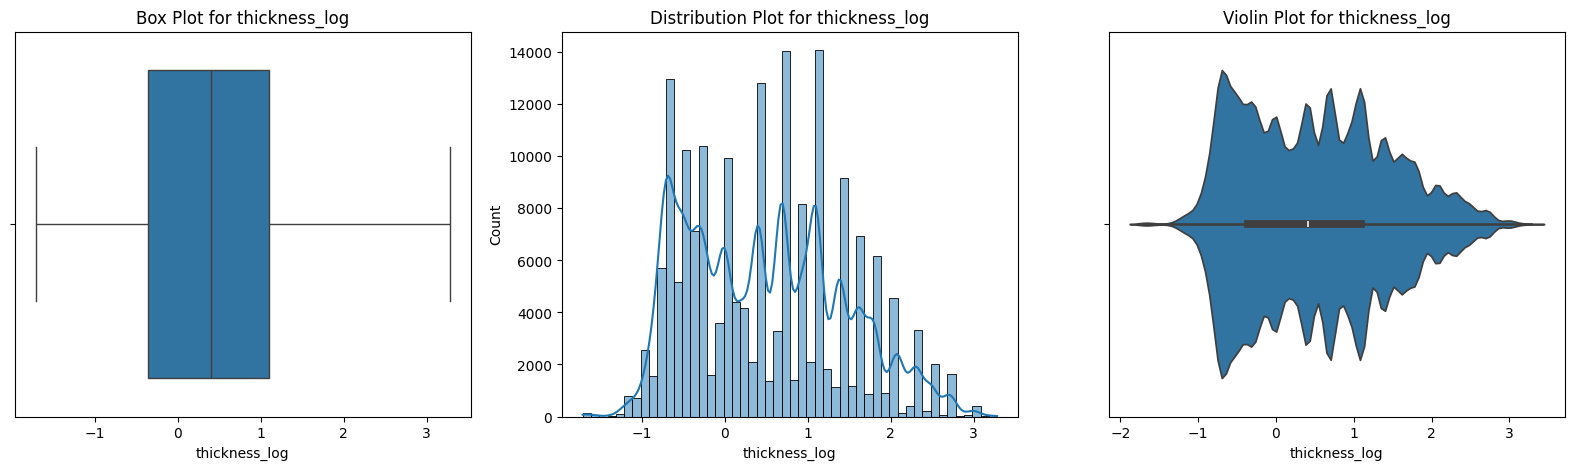

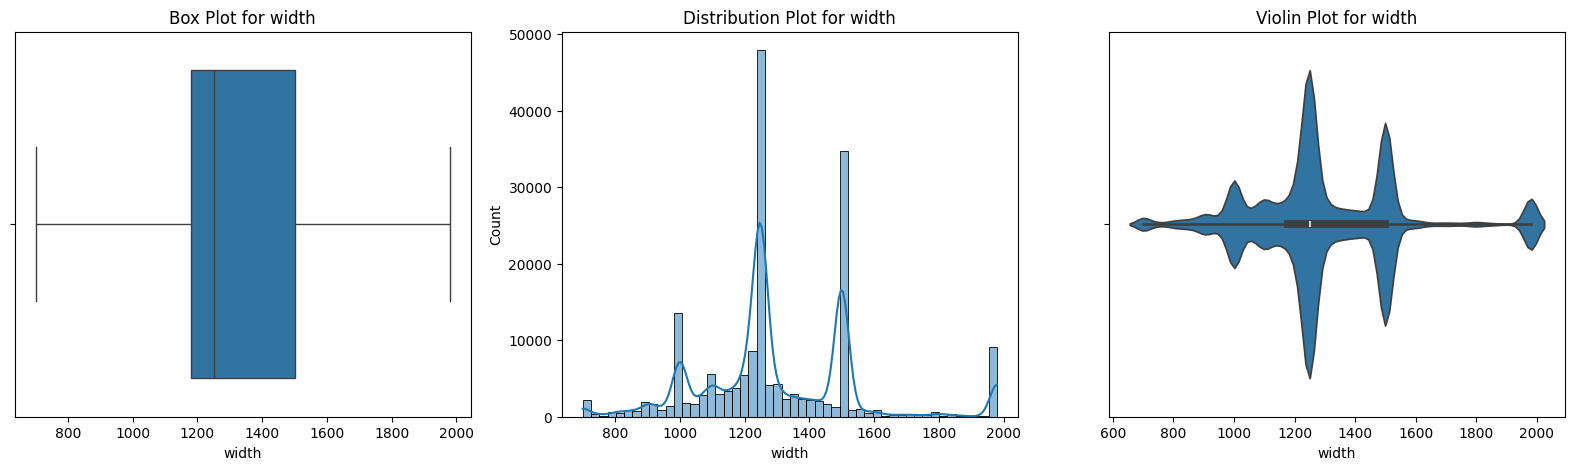

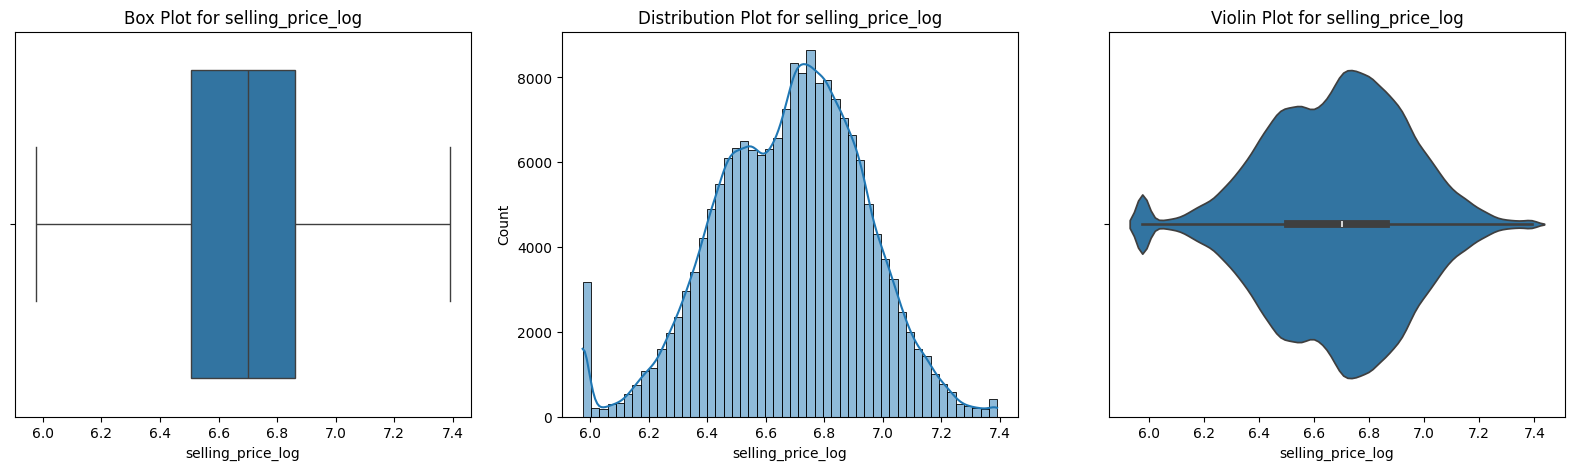

In [109]:
#plotting after skew and outliers 

for i in ['quantity_tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df_1, i)

<Axes: >

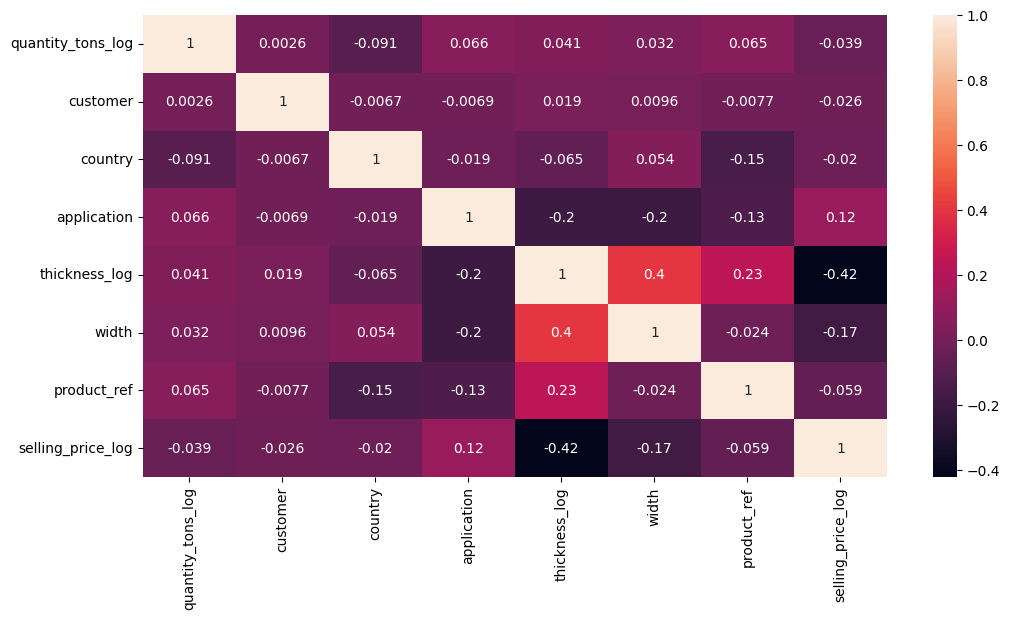

In [110]:
# verify any columns are highly correlated using Heatmap

cor=df_1[['quantity_tons_log', 'customer', 'country', 'application', 'thickness_log', 'width','product_ref', 'selling_price_log']].corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True)

In [111]:
# Regression model to predict selling price
df_2=df_1.copy()
df_2

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,3.991779,0.693147,6.749931
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684
2,30153963.0,30.0,Won,WI,28.0,952.0,628377,5.956169,-0.967584,6.468211
3,30349574.0,32.0,Won,S,59.0,1317.0,1668701718,5.310301,0.832909,6.643790
4,30211560.0,28.0,Won,W,10.0,1980.0,640665,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,Won,W,41.0,1220.0,164141591,4.629691,-0.040822,6.381816
181669,30200854.0,25.0,Won,W,41.0,1500.0,164141591,5.337954,-0.051293,6.378426
181670,30200854.0,25.0,Won,W,41.0,1250.0,164141591,1.443523,-0.342490,6.428105
181671,30200854.0,25.0,Won,W,41.0,1250.0,164141591,3.413291,-0.162519,6.398595


In [112]:
#checking values count to encoding the catogorical features

df_2["status"].value_counts()

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [113]:
# using map function encoding the values in status column

df_2["status"]= df_2["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df_2['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [114]:
#checking values count to encoding the catogorical features

df_2['item type'].value_counts()

item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [115]:
# using ordinalencoder to encode the values in item type column

df_2["item type"]= OrdinalEncoder().fit_transform(df_2[["item type"]])
df_2['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [116]:
df_2.head()

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684
2,30153963.0,30.0,1,6.0,28.0,952.0,628377,5.956169,-0.967584,6.468211
3,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,5.310301,0.832909,6.643790
4,30211560.0,28.0,1,5.0,10.0,1980.0,640665,6.666354,1.386294,6.357842


In [117]:
x=df_2.drop(columns=['selling_price_log'])
y=df_2['selling_price_log']

In [118]:
# Assuming x and y are your features and target variable, respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}

# Fit the models
for model_name, model in models.items():
    model.fit(x_train, y_train)

# Make predictions
predictions = {model_name: model.predict(x_test) for model_name, model in models.items()}

# Calculate the metrics and store the results
results = []
for model_name, preds in predictions.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    num_features = x_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))
    results.append({"Model": model_name, "MSE": mse, "R2": r2, "Adjusted R2": adjusted_r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results for each model
for index, row in results_df.iterrows():
    print(f"Model: {row['Model']}")
    print(f"MSE: {row['MSE']}")
    print(f"R2: {row['R2']}")
    print(f"Adjusted R2: {row['Adjusted R2']}")
    print()

# Find and display the model with the highest R² value
max_r2_row = results_df.loc[results_df['R2'].idxmax()]
print("Model with the highest R²:")
print(f"Model: {max_r2_row['Model']}")
print(f"MSE: {max_r2_row['MSE']}")
print(f"R2: {max_r2_row['R2']}")
print(f"Adjusted R2: {max_r2_row['Adjusted R2']}")

Model: Linear Regression
MSE: 0.05350619019107238
R2: 0.18083097912087587
Adjusted R2: 0.18069568364286248

Model: Decision Tree Regressor
MSE: 0.03329498284674424
R2: 0.49026050254451736
Adjusted R2: 0.49017631302170495

Model: Random Forest Regression
MSE: 0.019385626345329955
R2: 0.7032099557878422
Adjusted R2: 0.7031609373925198

Model with the highest R²:
Model: Random Forest Regression
MSE: 0.019385626345329955
R2: 0.7032099557878422
Adjusted R2: 0.7031609373925198


In [119]:
#For Regression Model, Random Forest Regression Performs with 70% accuracy
Random_Forest_Regression= RandomForestRegressor()
Random_Forest_Regression.fit(x,y)

RandomForestRegressor()

In [120]:
import joblib
joblib.dump(Random_Forest_Regression,"Regression_Model")

['Regression_Model']

In [121]:
quantity_tons_log = np.log(1.655480)
thickness_log = np.log(0.536493	)

new_sample = np.array([[30200854.0,25.0,1,5.0,41.0,1240.0,164141591,quantity_tons_log,thickness_log]])
# Make predictions using the trained RandomForestRegressor model
new_pred = Random_Forest_Regression.predict(new_sample)[0]

# Display the predicted selling price
print("Selling Price:", np.exp(new_pred))

Selling Price: 963.8379949667597


In [122]:
# Saving the model
import pickle
with open('Regression.pkl', 'wb') as file:
    pickle.dump(Random_Forest_Regression, file)

In [123]:
# Classifier Model to predict the Status
#filter out the values (won|lost) in status column

won=df_2[df_2['status']==1]
lost=df_2[df_2['status']==0]

In [124]:
print(won.shape)
print(lost.shape)

(116012, 10)
(34438, 10)


In [125]:
#data is not equal doing under sampling
won_sample=won.sample(n=34431)

In [126]:
class_data=pd.concat([won_sample,lost],axis=0)

In [128]:
class_data['status'].value_counts()

status
0    34438
1    34431
Name: count, dtype: int64

In [129]:
X=class_data.drop(columns=['status'],axis=1)
y=class_data['status']

In [130]:
# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the classifiers
rfc = RandomForestClassifier()
clf = DecisionTreeClassifier()
et_clf = ExtraTreesClassifier()

# Train the classifiers
rfc.fit(X_train, y_train)
clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)

# Make predictions with each classifier
rfc_predict = rfc.predict(X_test)
clf_predict = clf.predict(X_test)
nb_clf_predict = et_clf.predict(X_test)

# Calculate accuracy scores
rfc_accuracy = accuracy_score(y_test, rfc_predict)
clf_accuracy = accuracy_score(y_test, clf_predict)
et_clf_accuracy = accuracy_score(y_test, nb_clf_predict)

# Store accuracy scores in a dictionary
accuracy_scores = {
    "Random Forest Classifier": rfc_accuracy,
    "Decision Tree Classifier": clf_accuracy,
    "Extra Trees Classifier": et_clf_accuracy
}

# Print accuracy scores
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Find and print the model with the highest accuracy
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model_name]

print(f"\nModel with the highest accuracy:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.9145
Decision Tree Classifier Accuracy: 0.8794
Extra Trees Classifier Accuracy: 0.9116

Model with the highest accuracy:
Model: Random Forest Classifier
Accuracy: 0.9145


In [131]:
#For Classification Model, RandomForest Classifier Performs well with 91% accuracy
rf1=RandomForestClassifier()
rf1.fit(X,y)

RandomForestClassifier()

In [132]:
import joblib
joblib.dump(rf1,"Classifier_Model")

['Classifier_Model']

In [133]:
class_data

,customer,country,status,item type,application,width,product_ref,quantity_tons_log,thickness_log,selling_price_log
4140,30205376.0,25.0,1,5.0,26.0,1174.0,1670798778,6.333271,0.916291,6.766192
667,30164472.0,26.0,1,5.0,41.0,1247.0,611993,2.787597,-0.287682,7.170888
4120,30205376.0,25.0,1,5.0,26.0,1250.0,1670798778,6.924734,0.405465,6.792344
132441,30205061.0,26.0,1,3.0,10.0,1500.0,628377,5.017803,0.693147,6.366470
50586,30268901.0,28.0,1,5.0,10.0,1980.0,640665,1.744565,2.079442,6.677083
...,...,...,...,...,...,...,...,...,...,...
181527,30161559.0,30.0,0,3.0,10.0,1525.0,640665,4.156686,1.766442,6.124683
181529,30161559.0,30.0,0,3.0,10.0,1500.0,640665,4.025862,2.060514,6.126869
181531,30161559.0,30.0,0,3.0,10.0,1830.0,640665,5.328963,1.348073,6.131226
181533,30198408.0,25.0,0,3.0,10.0,1150.0,1668701718,4.634669,0.336472,6.586172


In [134]:
classifier_model = joblib.load('Classifier_Model')
quantity_tons_log = 4.664121
thickness_log = 0.336472
selling_log = 6.588926
# Define the input data as a 1D array
input_data = np.array([30198408.0,25.0,3.0,10.0,1146.0,1668701718,quantity_tons_log,thickness_log,selling_log])

# Reshape the input data into a 2D array
input_data_2d = input_data.reshape(1, -1) 
predictions = classifier_model.predict(input_data_2d)
if predictions == 1:
    print("Won")
else:
    print("Lost")

Lost


In [135]:
# Saving the model
import pickle
with open('Classification_Model.pkl', 'wb') as file:
    pickle.dump(rf1, file)